# Dropout
Dropout [1] is a technique for regularizing neural networks by randomly setting some features to zero during the forward pass. In this exercise you will implement a dropout layer and modify your fully-connected network to optionally use dropout.

[1] [Geoffrey E. Hinton et al, "Improving neural networks by preventing co-adaptation of feature detectors", arXiv 2012](https://arxiv.org/abs/1207.0580)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from data_utils import get_CIFAR10_data
from implementations.layers import dropout_forward


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.items():
  print('%s: ' % k, v.shape)

X_train:  (49000, 3, 32, 32)
y_val:  (1000,)
X_val:  (1000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_test:  (1000,)
y_train:  (49000,)


# Dropout in Tensorflow
Let's first try the dropout function in Tensorflow.

In [3]:
np.random.seed(15009)
x = np.random.randn(500, 500) + 10

for p in [0.25, 0.4, 0.7]:
  
  # please read the documentation of tf.nn.dropout carefully
  out = tf.Session().run(tf.nn.dropout(x, keep_prob=p))

  print('Running tests with p = ', p)
  print('Mean of input: ', x.mean())
  print('Mean of train-time output: ', out.mean())
  print('Fraction of train-time output set to zero: ', (out == 0).mean())
  print()

Running tests with p =  0.25
Mean of input:  9.998768973493084
Mean of train-time output:  9.970733316179048
Fraction of train-time output set to zero:  0.750684

Running tests with p =  0.4
Mean of input:  9.998768973493084
Mean of train-time output:  9.999536866469876
Fraction of train-time output set to zero:  0.599808

Running tests with p =  0.7
Mean of input:  9.998768973493084
Mean of train-time output:  10.003046937497643
Fraction of train-time output set to zero:  0.299744



# Dropout forward pass
In the file `implementations/layers.py`, implement the forward pass for dropout. Since dropout behaves differently during training and testing, make sure to implement the operation for both modes.

Once you have done so, run the cell below to test your implementation.

In [4]:
np.random.seed(15009)
x = np.random.randn(500, 500) + 10

for p in [0.25, 0.4, 0.7]:
  out = dropout_forward(x, {'mode': 'train', 'p': p})

  # Hint: The tensorflow dropout does not have a mode parameter to specify the mode.
  out_test = dropout_forward(x, {'mode': 'test', 'p': p})

  print('Running tests with p = ', p)
  print('Mean of input: ', x.mean())
  print('Mean of train-time output: ', out.mean())
  print('Mean of test-time output: ', out_test.mean())
  print('Fraction of train-time output set to zero: ', (out == 0).mean())
  print('Fraction of test-time output set to zero: ', (out_test == 0).mean())
  print()

Running tests with p =  0.25
Mean of input:  9.998768973493084
Mean of train-time output:  9.986276462158349
Mean of test-time output:  9.998768973493084
Fraction of train-time output set to zero:  0.750368
Fraction of test-time output set to zero:  0.0

Running tests with p =  0.4
Mean of input:  9.998768973493084
Mean of train-time output:  9.99260827072689
Mean of test-time output:  9.998768973493084
Fraction of train-time output set to zero:  0.600272
Fraction of test-time output set to zero:  0.0

Running tests with p =  0.7
Mean of input:  9.998768973493084
Mean of train-time output:  9.991168540691852
Mean of test-time output:  9.998768973493084
Fraction of train-time output set to zero:  0.300436
Fraction of test-time output set to zero:  0.0



## Inline Question 1:
What happens if we do not divide the values being passed through inverse dropout by `p` in the dropout layer? Why does that happen?

## Answer:


# Fully-connected nets with Dropout

The assignment provides an implementation of fully connected neural network. You need to add dropout layters to the implementation. *Now you can use* `tf.nn.dropout`.

**Regularization experiment:**  As an experiment, we will train a pair of two-layer networks on 500 training examples: one will use no dropout, and one will use a keep probability of 0.25. We will then visualize the training and validation accuracies of the two networks over time.

In [10]:
from implementations.fc_net import FullyConnectedNet

# Train two identical nets, one with dropout and one without
np.random.seed(15009)
num_train = 500

X_train = data['X_train'][:num_train]
X_train = np.reshape(X_train, [X_train.shape[0], -1]) / 255
y_train = data['y_train'][:num_train]
X_val = data['X_val']
X_val = np.reshape(X_val, [X_val.shape[0], -1]) / 255
y_val = data['y_val']

traces={}
dropout_choices = [1, 0.25]
for keep_prob in dropout_choices:
  model = FullyConnectedNet(input_size=X_train[0].size, hidden_size=[500], output_size=10, use_dropout=True)



  train_trace= model.train(X=X_train, y=y_train, X_val=X_val, y_val=y_val,
                           learning_rate=2e-3, keep_prob=keep_prob,
                           reg=np.float32(5e-6), num_iters=1000,
                           batch_size=32, verbose=True)

  traces[keep_prob] = train_trace

iteration 0 / 1000: objective 74.464775
iteration 100 / 1000: objective 43.078400
iteration 200 / 1000: objective 32.892120
iteration 300 / 1000: objective 17.114697
iteration 400 / 1000: objective 14.227289
iteration 500 / 1000: objective 21.940382
iteration 600 / 1000: objective 3.831017
iteration 700 / 1000: objective 3.938269
iteration 800 / 1000: objective 2.005124
iteration 900 / 1000: objective 2.124489
iteration 0 / 1000: objective 74.820343
iteration 100 / 1000: objective 48.537846
iteration 200 / 1000: objective 47.384193
iteration 300 / 1000: objective 28.068825
iteration 400 / 1000: objective 25.463985
iteration 500 / 1000: objective 41.483379
iteration 600 / 1000: objective 11.067875
iteration 700 / 1000: objective 15.928671
iteration 800 / 1000: objective 9.476810
iteration 900 / 1000: objective 10.439307


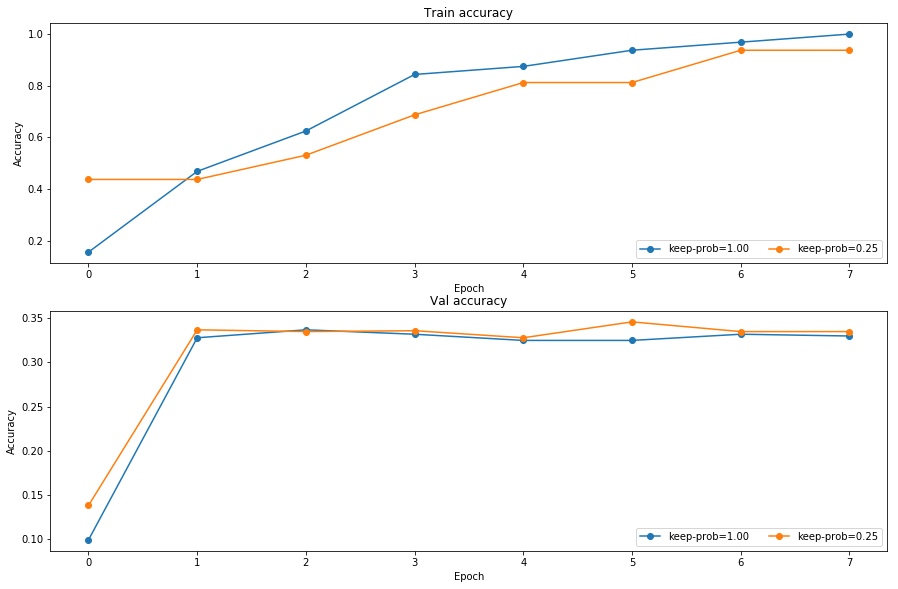

In [12]:
# Plot train and validation accuracies of the two models

train_accs = []
val_accs = []
for keep_prob in dropout_choices:
  trace = traces[keep_prob]
  train_accs.append(trace['train_acc_history'][-1])
  val_accs.append(trace['val_acc_history'][-1])

plt.subplot(3, 1, 1)
for keep_prob in dropout_choices:
  plt.plot(traces[keep_prob]['train_acc_history'], '-o', label='keep-prob=%.2f' % keep_prob)
plt.title('Train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')
  
plt.subplot(3, 1, 2)
for keep_prob in dropout_choices:
  plt.plot(traces[keep_prob]['val_acc_history'], '-o', label='keep-prob=%.2f' % keep_prob)
plt.title('Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')

plt.gcf().set_size_inches(15, 15)
plt.show()

## Inline Question 2:
Compare the validation and training accuracies with and without dropout -- what do your results suggest about dropout as a regularizer?

## Answer:


## Inline Question 3:
Suppose we are training a deep fully-connected network for image classification, with dropout after hidden layers (parameterized by keep probability p). How should we modify p, if at all, if we decide to decrease the size of the hidden layers (that is, the number of nodes in each layer)?

## Answer:
